In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import OneHotEncoder,MinMaxScaler,StandardScaler,LabelEncoder
from sklearn.compose import ColumnTransformer,make_column_selector
from sklearn import metrics

%matplotlib inline

# matplotlib inline sets the backend of matplotlib to the 'inline' backend:
# With this backend, the output of plotting commands is displayed inline within frontends like the Jupyter notebook, 
# directly below the code cell that produced it. The resulting plots will then also be stored in the notebook document

In [3]:
data=pd.read_csv(r"E:\Level Three First Term\Selected-1\Final Project\Project  Numerical Dataset\health_data.csv")
data.head(20)

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,1.0,18.0,0.0,0.0,1.0,1.0,1.0,0.0,2.0,7.0,0.0,0.0,0.0,0.0,0.0
6,13.0,1.0,1.0,1.0,26.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,6.0,1.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0
8,3.0,0.0,0.0,1.0,32.0,0.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
9,6.0,1.0,0.0,1.0,27.0,1.0,0.0,0.0,1.0,1.0,0.0,3.0,0.0,6.0,0.0,0.0,0.0,0.0


- Sex : patient's gender ( 1: male , 0: female )
- HighChol : 0 = not high cholesterol , 1 = high cholesterol
- CholCheck : 0 = no cholesterol check in 5 years , 1 = yes cholesterol check in 5 years
- BMI : Body Mass Index
- Smoker : Have you smoked at least 100 cigarettes in your entire life? [Note: 5 packs = 100 cigarettes] 0 = no 1 = yes
- HeartDiseaseorAttack : coronary heart disease (CHD) or myocardial infarction (MI) 0 = no 1 = yes
- PhysActivity : physical activity in past 30 days - not including job 0 = no 1 = yes
- Fruits : Consume Fruit 1 or more times per day 0 = no 1 = yes
- Veggies : Consume Vegetables 1 or more times per day 0 = no 1 = yes
- HvyAlcoholConsumption : Adult male: more than 14 drinks per week. Adult female: more than 7 drinks per week. 0 = no, 1 = yes
- GenHlth : Would you say that in general your health is: (scale 1-5) 1 = excellent, 2 = very good, 3 = good, 4 = fair, 5 = poor
- MentHlth : days of poor mental health scale 1-30 days
- PhysHlth : physical illness or injury days in past 30 days scale 1-30
- DiffWalk : Do you have serious difficulty walking or climbing stairs? 0 = no, 1 = yes
- Diabetes : 0 = no diabetes, 1 = diabetes
- Hypertension : 0 = no hypertension, 1 = hypertension
- Stroke : 0 = no, 1 = yes

In [4]:
## data.head().T
# transpose data ( convert rows by columns and vice versa )

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Diabetes           

- All the features are numerical and are of float64 dtype
- However, a quick look indicates that all the features except BMI are of categorical type

In [6]:
data['BMI'].unique()


array([26., 28., 29., 18., 31., 32., 27., 24., 21., 58., 30., 20., 22.,
       38., 40., 25., 36., 47., 19., 37., 41., 23., 34., 35., 42., 17.,
       33., 44., 15., 52., 69., 56., 45., 39., 92., 53., 98., 50., 46.,
       79., 48., 16., 63., 72., 54., 49., 68., 43., 84., 73., 76., 55.,
       51., 75., 57., 60., 12., 77., 82., 67., 71., 61., 14., 81., 59.,
       86., 13., 87., 65., 95., 89., 62., 64., 66., 85., 70., 83., 80.,
       78., 74.])

### There are no decimals in BMI feature. Hence, all the features can be cast as integers.

In [7]:
data = data.astype('int32')

# Handling Missing Values

In [8]:
data.isna().sum() # to indicate if there are null values

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
Hypertension            0
Stroke                  0
dtype: int64

# Handling Duplicated Values

In [18]:
data.duplicated().sum()

6672

In [20]:
data.drop_duplicates( inplace = True )

In [21]:
len( data )

64020

In [22]:
data['Diabetes'].value_counts() # to indicate how many people have diabetes 

1    33398
0    30622
Name: Diabetes, dtype: int64

In [23]:
data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,0,1,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,0,1,1
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,0,1,0
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0,0


In [24]:
data.describe()


,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
count,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000,64020.000000
mean,8.607420,0.455983,0.539550,0.973211,30.178554,0.490706,0.159950,0.678366,0.590862,0.771587,0.046345,2.921103,4.130537,6.385020,0.277007,0.521681,0.581756,0.068510
std,2.860717,0.498063,0.498437,0.161466,7.287730,0.499918,0.366563,0.467107,0.491679,0.419813,0.210233,1.107991,8.466301,10.368493,0.447524,0.499534,0.493275,0.252621
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
75%,11.000000,1.000000,1.000000,1.000000,34.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,3.000000,7.000000,1.000000,1.000000,1.000000,0.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


# Explore Our Dataset

In [25]:
data.shape

(64020, 18)

### As we can see, we have 64020 Rows (Instances)(Samples) and 18 Columns(Features)

In [26]:
data.columns

Index(['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk',
       'Diabetes', 'Hypertension', 'Stroke'],
      dtype='object')

### Above is the name of each column in our Dataset

# Visualization 

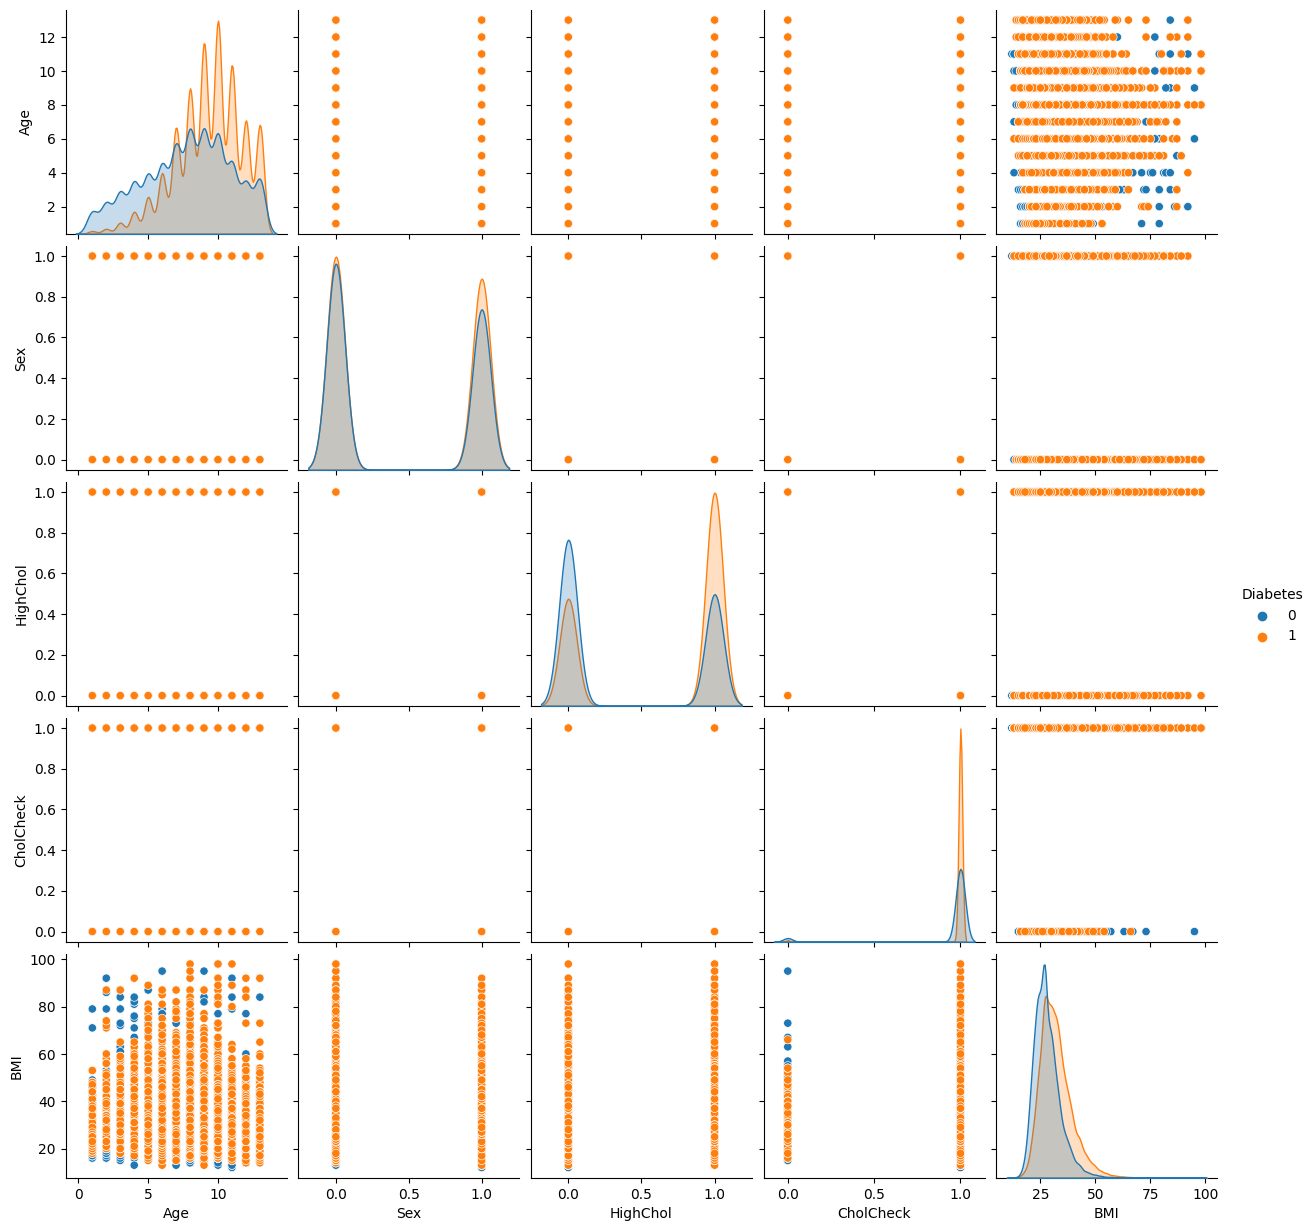

In [27]:
# Plotting out just the first 5 variables (features)
# the hue parameter determines which column in the data frame should be used for colour encoding. 

sns.pairplot(data, hue = 'Diabetes', vars = ['Age', 'Sex', 'HighChol','CholCheck','BMI'] )

**Note:** 
    
  1.0 (Orange) = Diabetes
  
  0.0 (Blue) = No Diabetes

# How many Diabetic and Non-Diabetic patients do we have ? 

In [28]:
Diabetes_pie = data["Diabetes"].value_counts()
Diabetes_pie

1    33398
0    30622
Name: Diabetes, dtype: int64

#### As shown we have 33398 Diabetic patients and 30622 Non-Diabetic patients


([<matplotlib.patches.Wedge at 0x23f68150ac0>,
 [Text(-0.07486524686098833, 1.0974494042152665, '1'),
  Text(0.07486524686098844, -1.0974494042152665, '0')])

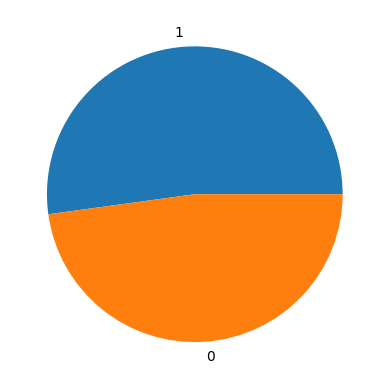

In [29]:
plt.pie( x = Diabetes_pie.values , labels = Diabetes_pie.index )

In [30]:
## sns.pairplot(data)
# to plot the distibution of each feature with all the other features 


# Visualize Our Counts 

<AxesSubplot: ylabel='count'>

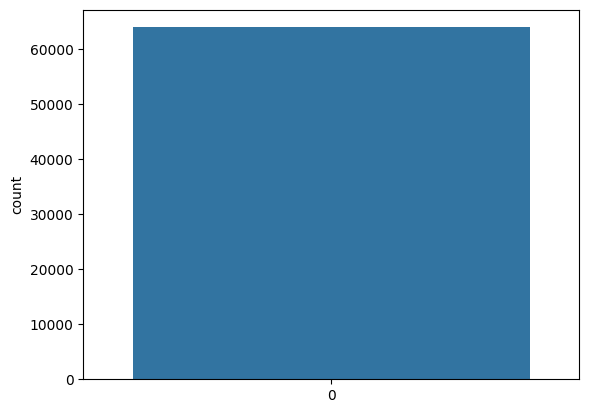

In [31]:
sns.countplot(data['Diabetes'], label = "Count") 

<AxesSubplot: xlabel='Diabetes', ylabel='count'>

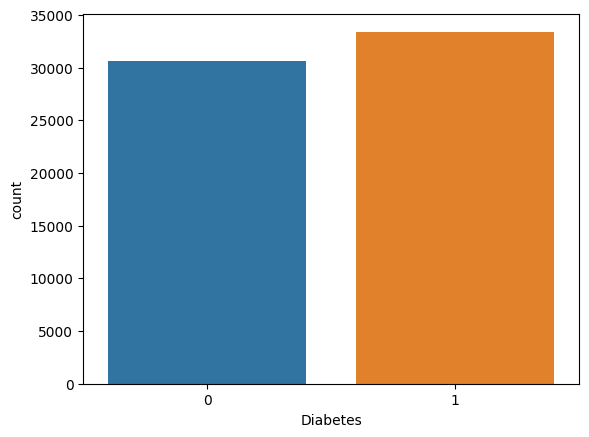

In [32]:
# To compare out target ( Diabetes ) to our data to see whether the data is balanced or not 
sns.countplot( x = 'Diabetes' , data = data )

#### As shown the data is balanced

# Histogram to all the Features  
- Histogram is a graphical display of using bars of different heights. It displays the shape and spread of the sample data. Taller bars show that more data falls in that range 

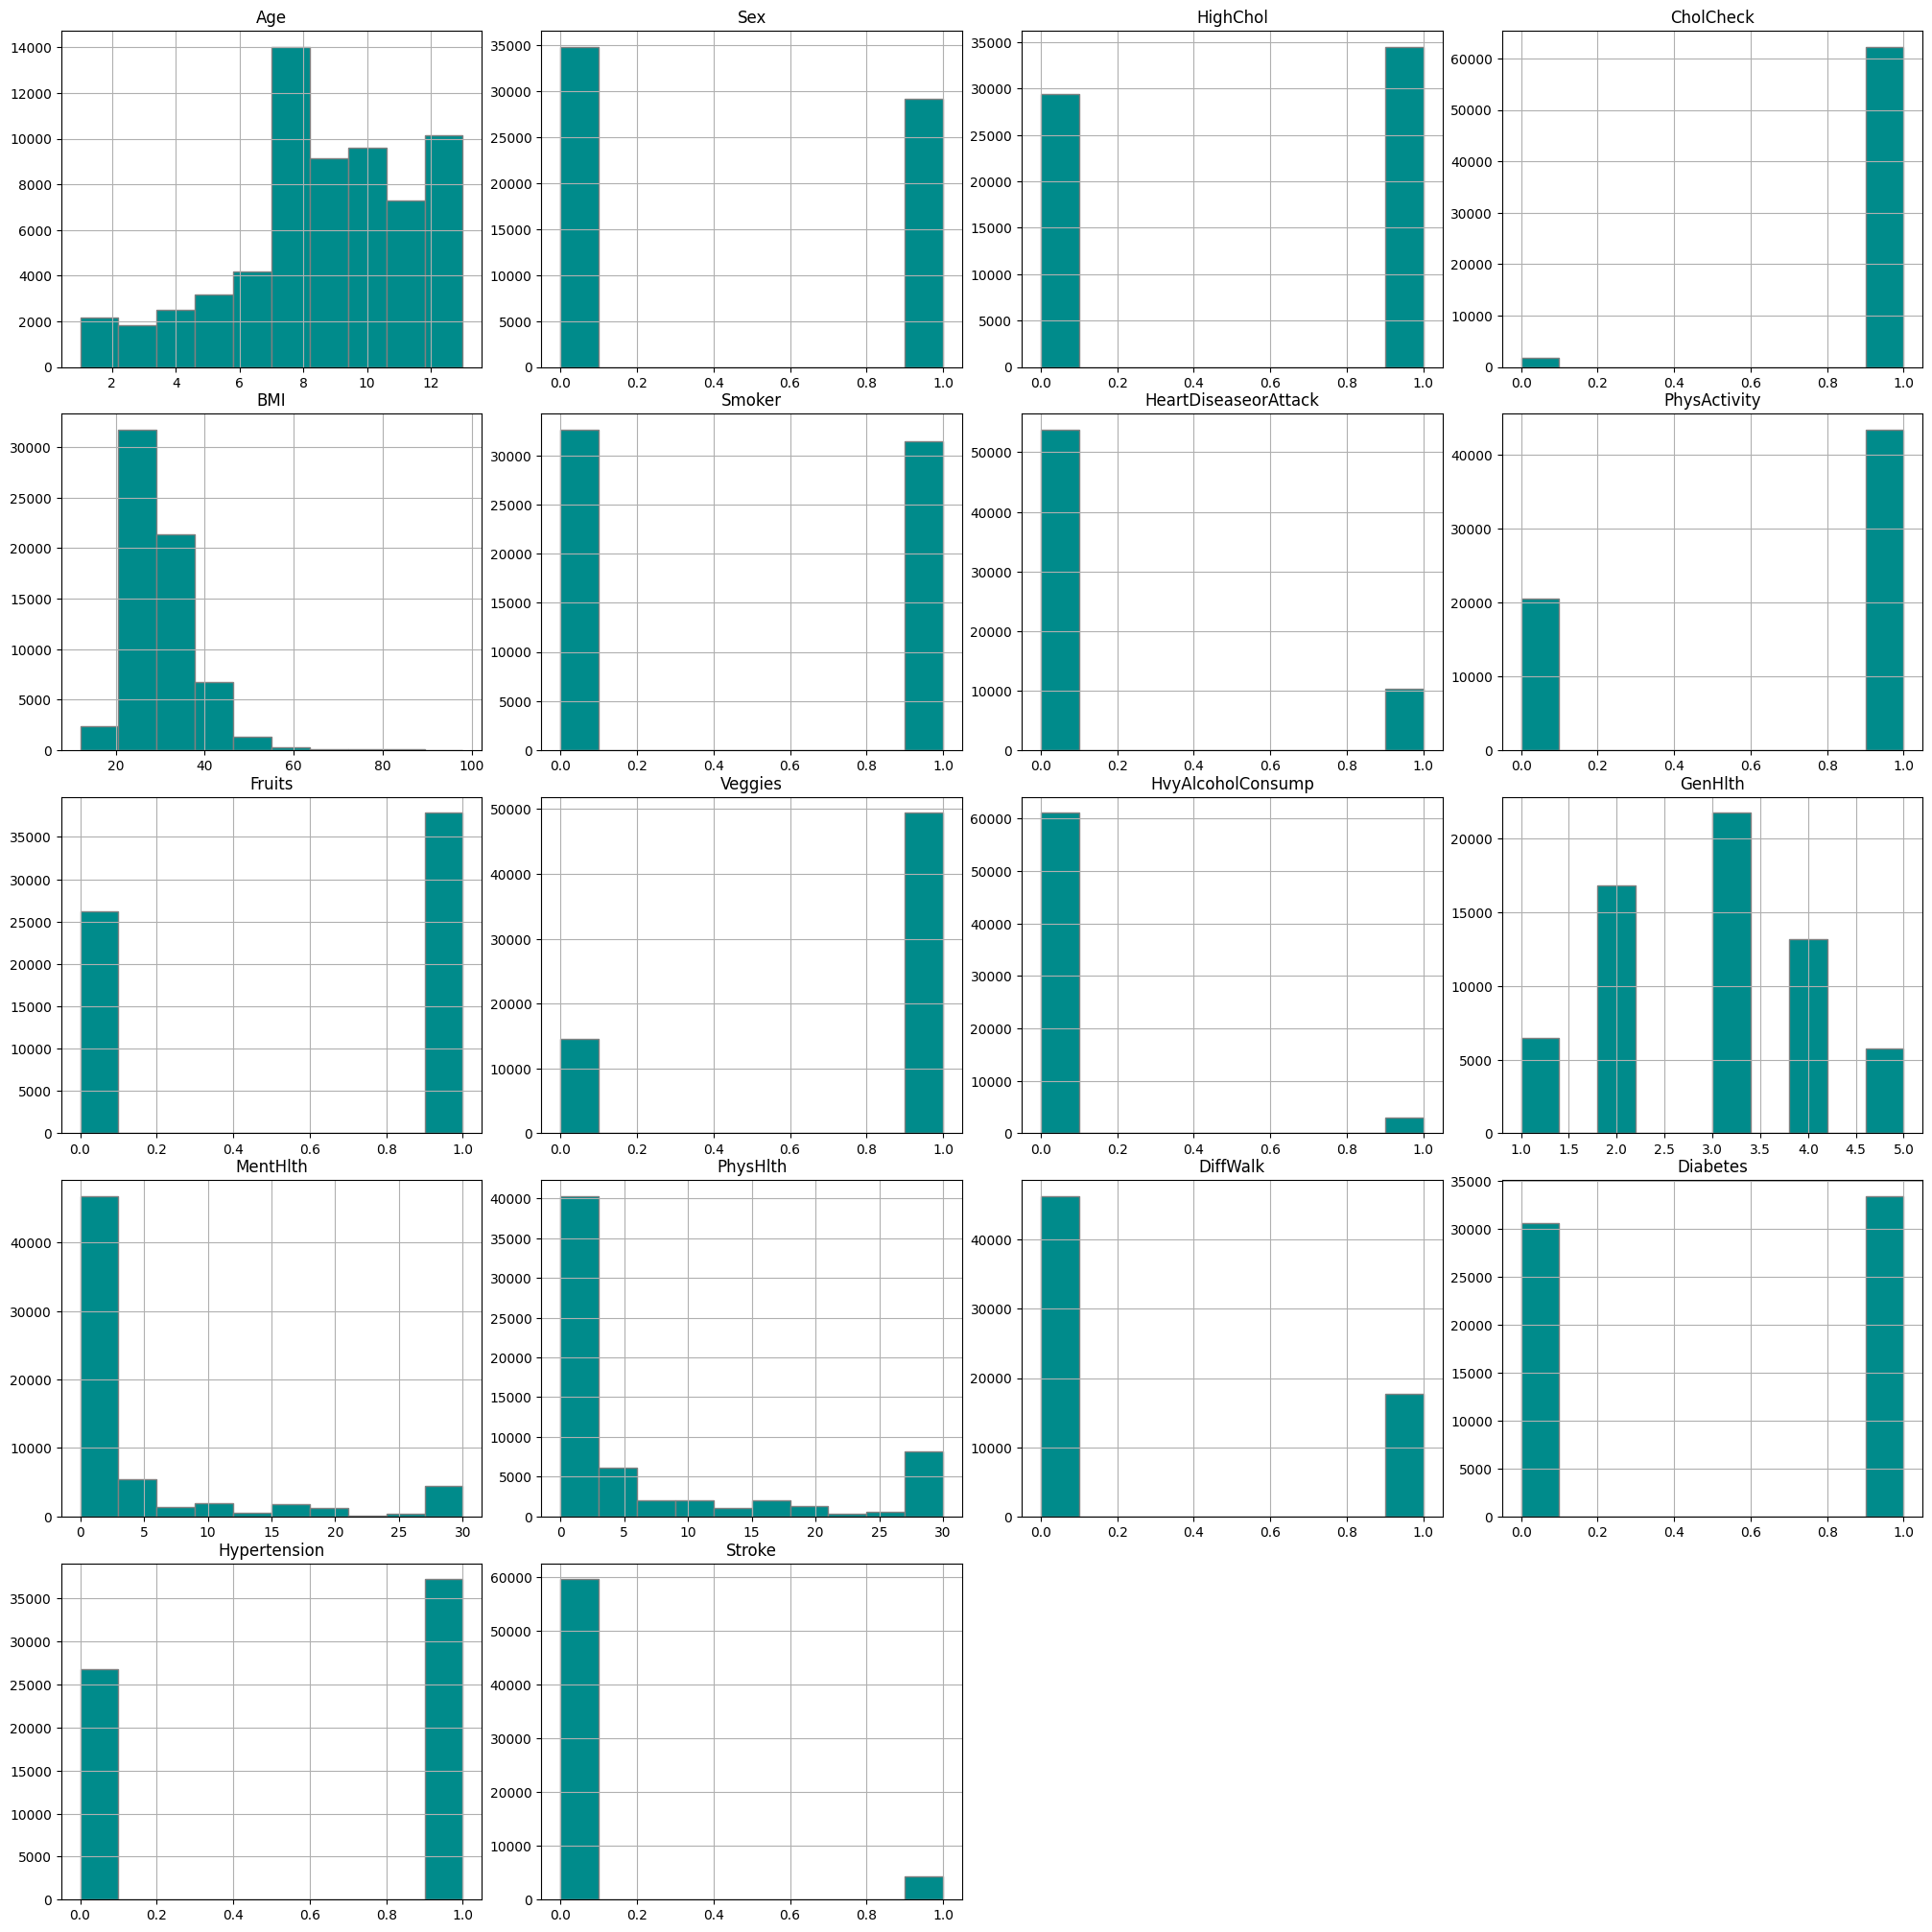

In [33]:
data.hist ( figsize = (20,20) , color = 'darkcyan' , edgecolor = 'gray' )
plt.tight_layout( pad = 0.2 ) # padding between the plots 
plt.show()

# Splitting Data

In [36]:
y = data.loc[ : , 'Diabetes'].values # y = all the rows in the Diabetes column ( entire column )
data.drop( ['Diabetes'] , axis = 1 , inplace=True ) 
# We drop our "target" feature and use all the remaining features in our data to train the model.
X = data.iloc[ : , : ].values # all the rows in all the columns  


In [37]:
data.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Hypertension,Stroke
0,4,1,0,1,26,0,0,1,0,1,0,3,5,30,0,1,0
1,12,1,1,1,26,1,0,0,1,0,0,3,0,0,0,1,1
2,13,1,0,1,26,0,0,1,1,1,0,1,0,10,0,0,0
3,11,1,1,1,28,1,0,1,1,1,0,3,0,3,0,1,0
4,8,0,0,1,29,1,0,1,1,1,0,2,0,0,0,0,0


In [38]:
from sklearn.model_selection import train_test_split
train_X , test_X , train_y , test_y = train_test_split( X , y , test_size = 0.2 , random_state = 20 ) #train 80% ,test 20%

# Displaying the Size of Our Training & Testing Data

In [39]:
print ('The size of our training "X" (input features) is', train_X.shape)
print ('\n')
print ('The size of our testing "X" (input features) is', test_X.shape)
print ('\n')
print ('The size of our training "y" (output feature) is', train_y.shape)
print ('\n')
print ('The size of our testing "y" (output features) is', test_y.shape)

The size of our training "X" (input features) is (51216, 17)


The size of our testing "X" (input features) is (12804, 17)


The size of our training "y" (output feature) is (51216,)


The size of our testing "y" (output features) is (12804,)


## As shown we have 51216 Training Samples and 12804 Validation & Testing Samples

# Logistic Regression Model 


In [40]:
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression() # 73 %

## model = DecisionTreeClassifier() # 62 %
# model = ExtraTreeClassifier() # 62 %
# model = RandomForestClassifier() # 69 %
## model = GradientBoostingClassifier() # 74.4 % 

In [41]:
log_model.fit( train_X , train_y ) # for train 

LogisticRegression()

In [42]:
y_pred = log_model.predict( test_X ) #Generate predictions with the model using our X values

# Evaluate Model 


In [43]:
from sklearn.metrics import accuracy_score
print("Accuracy: " , accuracy_score(y_pred,test_y)*100,' %')

Accuracy:  73.6879100281162  %


# Confusion Matrix :
- the actual is in columns and the predicted is in the rows

> **True Positive**: A positive class observation (1) is correctly classified as positive by the model.

> **False Positive**: A negative class observation (0) is incorrectly classified as positive.

> **True Negative**: A negative class observation is correctly classified as negative.

> **False Negative**: A positive class observation is incorrectly classified as negative.


In [44]:
from sklearn.metrics import confusion_matrix , classification_report

#Get the confusion matrix
cf_matrix = confusion_matrix( test_y , y_pred )
print(cf_matrix)


[[4214 1876]
 [1493 5221]]


<AxesSubplot: >

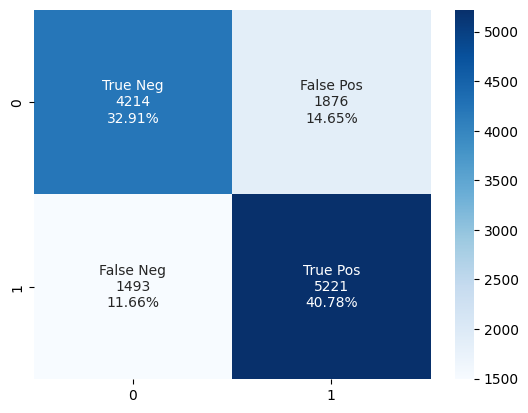

In [45]:
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

# The fmt field was added in order to prevent formatting being applied to the manual label
# Python zip() method takes iterable or containers and returns a single iterator object, having mapped values from all the containers. 
# It is used to map the similar index of multiple containers so that they can be used just using a single entity. 

# Receiver Operating Characteristic Curve ( ROC )
- This is a plot that displays the sensitivity ( True positive rate ) and specificity ( True negative rate ) of a logistic regression model.
- AUC ( Area Under ROC Curve ) measures the entire two-dimensional area underneath the entire ROC curve 
- The closer AUC is to 1, the better the model. A model with an AUC equal to 0.5 is no better than a model that makes random classifications.

In [46]:
y_pred_prob1 = log_model.predict_proba(test_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_prob1)

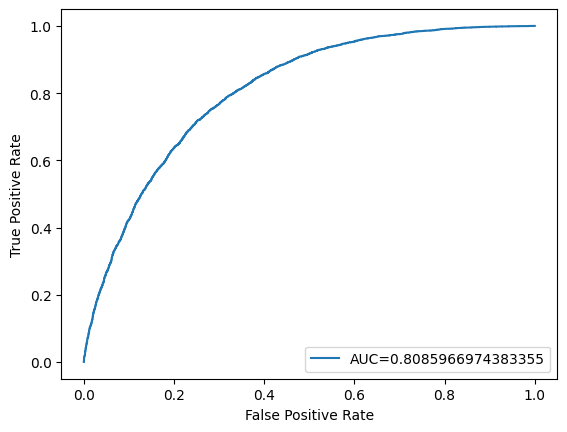

In [47]:
# Define metrics
y_pred_prob1 = log_model.predict_proba(test_X)[::,1]
fpr, tpr, _ = metrics.roc_curve(test_y,  y_pred_prob1)
auc = metrics.roc_auc_score(test_y, y_pred_prob1)

# Create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


# As shown AUC = 0.808

In [48]:
print(classification_report( test_y , y_pred) )

              precision    recall  f1-score   support

           0       0.74      0.69      0.71      6090
           1       0.74      0.78      0.76      6714

    accuracy                           0.74     12804
   macro avg       0.74      0.73      0.74     12804
weighted avg       0.74      0.74      0.74     12804



# Suport Vector Maching (SVM)

In [49]:
from sklearn.svm import SVC
svc_model = SVC( kernel = 'rbf' , probability=True)  

In [50]:
svc_model.fit( train_X , train_y )

SVC(probability=True)

In [51]:
y_pred2 = svc_model.predict( test_X )
print("Accuracy: ",accuracy_score( y_pred2 , test_y )*100,' %')

Accuracy:  74.21118400499844  %


# Confusion Matrix

In [52]:
from sklearn.metrics import confusion_matrix 

#Get the confusion matrix
cf_matrix_svc = confusion_matrix( test_y , y_pred2 )
print(cf_matrix_svc)


[[4054 2036]
 [1266 5448]]


<AxesSubplot: >

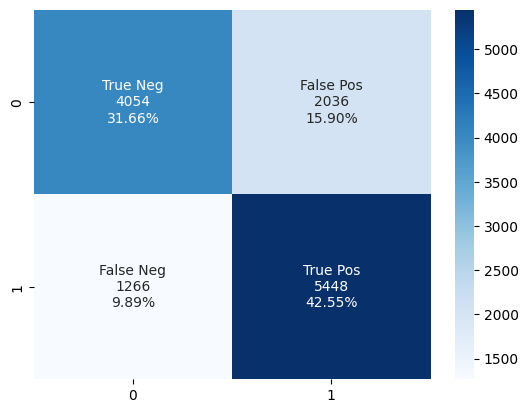

In [53]:
group_names2 = ['True Neg','False Pos','False Neg','True Pos']
group_counts2 = ["{0:0.0f}".format(value) for value in cf_matrix_svc.flatten()]
group_percentages2 = ["{0:.2%}".format(value) for value in cf_matrix_svc.flatten()/np.sum(cf_matrix_svc)]
labels2 = [f"{v4}\n{v5}\n{v6}" for v4, v5, v6 in zip(group_names2,group_counts2,group_percentages2)]
labels2 = np.asarray(labels2).reshape(2,2)
sns.heatmap(cf_matrix_svc, annot=labels2, fmt='', cmap='Blues')


# Receiver Operating Characteristic Curve ( ROC )


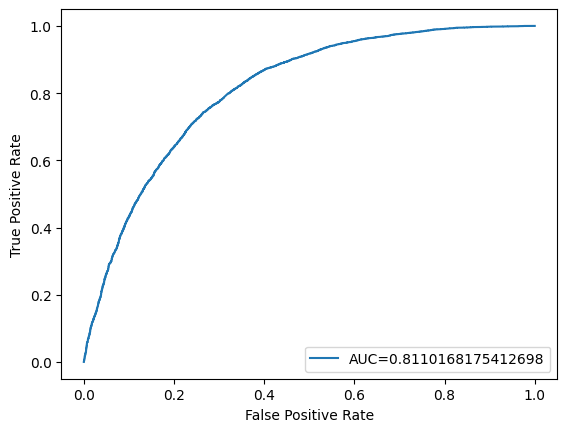

In [54]:
# Define metrics
y_pred2_prob2 = svc_model.predict_proba(test_X)[::,1]
fpr2, tpr2, _ = metrics.roc_curve(test_y,  y_pred2_prob2)
auc_svc = metrics.roc_auc_score(test_y, y_pred2_prob2)

# Create ROC curve
plt.plot(fpr2,tpr2,label="AUC="+str(auc_svc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()


# As shown AUC = 0.811

**Next step is to check the accuracy of our prediction by comparing it to the output we already have (y_test). We are going to use confusion matrix for this comparison**

In [55]:
print(classification_report( test_y , y_pred2 ) )

              precision    recall  f1-score   support

           0       0.76      0.67      0.71      6090
           1       0.73      0.81      0.77      6714

    accuracy                           0.74     12804
   macro avg       0.74      0.74      0.74     12804
weighted avg       0.74      0.74      0.74     12804

